In [1]:
from earthai.init import *

# You can adjust spark settings by using below code instead of `earthai.init` import
# from earthai.all import *
# spark = create_earthai_spark_session(**{'spark.driver.memory': '30g'})

import folium
import folium.plugins
import geopandas as gpd


Importing EarthAI libraries.
EarthAI version 1.4.0.dev; RasterFrames version 0.9.0.dev+astraea.1ce1ff3; PySpark version 2.4.4

Creating SparkSession...
  SparkSession is available as `spark`.


In [2]:
# read in cement dataset
cement_df = gpd.read_file("/home/jovyan/examples/data/cement_dataset_v2_exact.geojson")

# add a unique identifier for each plant
cement_df = cement_df.reset_index()
cement_df.head()

,index,iso3,country,plant_type,gcd_plant_name,gcd_company_name,gcd_location,status,accuracy,desc,num_kilns_1,kiln_type_1,num_kilns_2,kiln_type_2,capacity,capacity_unit,contact,tel,fax,geometry
0,0,PHL,Philippines,Integrated,None,Republic Cement,None,Operating,Exact,None,NaN,None,NaN,None,NaN,None,None,None,None,POINT (124.26407 8.28874)
1,1,FRA,France,Integrated,Havre-Saint-Vigor Plant,Lafarge Ciments (LafargeHolcim),Le Havre,Operating,Exact,1 Dry - 1.0Mt/yr,1.0,DRY,NaN,None,1.0,Mt/yr,Didier Vincent,Tel: +33 2 3279 2000,Fax: +33 2 3279 2011,POINT (0.31709 49.46722)
2,2,IRN,"Iran, Islamic Republic of",Integrated,None,Bank Melli Iran Investment Company (CIDCO),"Kangan, Būshehr",Operating,Exact,1 Dry - 2.0Mt/yr,1.0,DRY,NaN,None,2.0,Mt/yr,Rahmat-ollah Roustapour,Tel: +98 77 2722 8221,Fax: +98 77 2722 8220,POINT (52.17524 27.72963)
3,3,BRA,Brazil,Integrated,Corumbá Plant,Votorantim Cimentos,"Corumbá, Mato Grosso do Sul",Operating,Exact,1 Dry - 0.2Mt/yr,1.0,DRY,NaN,None,0.2,Mt/yr,Orlando Silva,Tel: +55 67 234 2210,None,POINT (-57.62406 -19.00333)
4,4,IDN,Indonesia,Integrated,None,Semen Indonesia,"Pidie, Aceh",Under Construction,Exact,3Mt/yr (Due in 2019-2020),NaN,None,NaN,None,3.0,Mt/yr,None,None,None,POINT (95.89015 5.48588)


In [3]:
# plot cement plants on a leaflet map
m = folium.Map()
m.add_child(folium.plugins.FastMarkerCluster(
    cement_df.geometry.apply(lambda g: [g.centroid.y, g.centroid.x]) # plot just the centre points
))
m

In [4]:
# limit to first 100 plants for now...
cement_df = cement_df.head(100)

In [5]:
# add small buffer to points so they are polygons - EoD requires this
from earthai.geo import reproject_on_the_fly, reproject_to_wgs84

def buffer_meters(g, dist_meter):
    g_utm, crs = reproject_on_the_fly(g)
    g_utm = g_utm.buffer(dist_meter)
    return reproject_to_wgs84(g_utm, crs)

cement_df.geometry = cement_df.geometry.apply(lambda g: buffer_meters(g, 1000.0))

In [6]:
# show all imagery collection available within EoD
earth_ondemand.collections()

,allowed,description,familyId,familyTitle,id,license,presentable,stac_extensions,stac_version,title,link,spatial_extent,temporal_extent
0,True,Landsat 8 Collection 1 Tier 1 Precision Terrain from Landsat 8 Operational Land Imager (OLI) and Thermal Infrared Sensor (TIRS) data,landsat8,Landsat 8,landsat8_l1tp,PDDL-1.0,True,[],0.9.0,Landsat 8 C1 T1,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2013-03-18 15:59:02.333000+00:00, None)"
1,True,MCD43A4: MODIS/Terra and Aqua Nadir BRDF-Adjusted Reflectance Daily L3 Global 500 m SIN Grid V006,modis,MODIS,mcd43a4,proprietary,True,[],0.9.0,MCD43A4 NBAR,https://eod-catalog-svc-prod.astraea.earth/collections/mcd43a4,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-16 00:00:00+00:00, None)"
2,True,MOD11A1: MODIS/Terra Land Surface Temperature/Emissivity Daily L3 Global 1 km SIN Grid V006,modis,MODIS,mod11a1,proprietary,True,[],0.9.0,MOD11A1 LST,https://eod-catalog-svc-prod.astraea.earth/collections/mod11a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-24 00:00:00+00:00, None)"
3,True,MYD11A1: MODIS/Aqua Land Surface Temperature/Emissivity Daily L3 Global 1 km SIN Grid V006,modis,MODIS,myd11a1,proprietary,True,[],0.9.0,MYD11A1 LST,https://eod-catalog-svc-prod.astraea.earth/collections/myd11a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2002-07-04 00:00:00+00:00, None)"
4,True,MOD13A1: MODIS/Terra Vegetation Indices 16-Day L3 Global 500 m SIN Grid V006,modis,MODIS,mod13a1,proprietary,True,[],0.9.0,MOD13A1 VI,https://eod-catalog-svc-prod.astraea.earth/collections/mod13a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-18 00:00:00+00:00, None)"
5,True,MYD13A1: MODIS/Aqua Vegetation Indices 16-Day L3 Global 500 m SIN Grid V006,modis,MODIS,myd13a1,proprietary,True,[],0.9.0,MYD13A1 VI,https://eod-catalog-svc-prod.astraea.earth/collections/myd13a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2002-07-04 00:00:00+00:00, None)"
6,True,Sentinel-2 Level-2A atmospherically corrected data,sentinel,Sentinel,sentinel2_l2a,CC-BY-SA-3.0,True,[],0.9.0,Sentinel-2 L2A,https://eod-catalog-svc-prod.astraea.earth/collections/sentinel2_l2a,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2018-04-01 07:02:22.463000+00:00, None)"
7,True,Sentinel-2 Level-1C top of atmosphere,sentinel,Sentinel,sentinel2_l1c,CC-BY-SA-3.0,True,[],0.9.0,Sentinel-2 L1C,https://eod-catalog-svc-prod.astraea.earth/collections/sentinel2_l1c,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2015-06-27 10:25:31.456000+00:00, None)"
8,True,National Agriculture Imagery Program aerial imagery,naip,NAIP,naip,proprietary,True,[],0.9.0,NAIP,https://eod-catalog-svc-prod.astraea.earth/collections/naip,"POLYGON ((-66.9513812 24.7433195, -66.9513812 4...","(2012-04-23 12:00:00+00:00, None)"


## Landsat Tiles

In [7]:
# read imagery catalog
catalog = earth_ondemand.read_catalog(cement_df.geometry, 
    start_datetime='2019-10-01', 
    end_datetime='2019-12-31', 
    max_cloud_cover=1,
    collections='landsat8_l1tp'
)

100%|██████████| 187/187 [00:02<00:00, 67.72it/s] 


In [8]:
# join imagery catalog back to cement dataframe
cement_catalog = gpd.sjoin(cement_df, catalog)
len(cement_catalog)

224

In [9]:
# show landsat bands in EoD
earth_ondemand.bands('landsat8_l1tp')

,band_name,eo_common_name,eo_gsd,title,type,collection_id,roles
0,B5,nir,30.0,Band 5 - Near Infrared (NIR) 0.851-0.879μm (30m),image/tiff,landsat8_l1tp,NaN
1,thumb_large,NaN,NaN,Thumbnail - Large,image/jpeg,landsat8_l1tp,[overview]
2,thumb_small,NaN,NaN,Thumbnail - Small,image/jpeg,landsat8_l1tp,[thumbnail]
3,B9,cirrus,30.0,Band 9 - Cirrus 1.363-1.384μm (30m),image/tiff,landsat8_l1tp,NaN
4,B6,swir16,30.0,Band 6 - Shortwave Infrared (SWIR) 1 1.566-1.651μm (30m),image/tiff,landsat8_l1tp,NaN
5,B3,green,30.0,Band 3 - Green 0.533-0.590μm (30m),image/tiff,landsat8_l1tp,NaN
6,B7,swir22,30.0,Band 7 - Shortwave Infrared (SWIR) 2 2.107-2.294μm (30m),image/tiff,landsat8_l1tp,NaN
7,B10,lwir11,30.0,Band 10 - Thermal Infrared (TIRS) 1 10.60-11.19μm (30m),image/tiff,landsat8_l1tp,NaN
8,B2,blue,30.0,Band 2 - Blue 0.452-0.512μm (30m),image/tiff,landsat8_l1tp,NaN
9,BQA,NaN,30.0,Band QA,image/tiff,landsat8_l1tp,NaN


In [10]:
# filter out unused columns
cement_catalog = cement_catalog[['index', 'country', 'geometry', 'datetime', 'proj_crs', 'proj_geometry', 'B4', 'B3', 'B2', 'B5', 'B6', 'B7', 'B10', 'B11', 'BQA']]

In [11]:
# create structured metadata columns to use: "crs", "extent", "raster_size" - this step isn't necessary but it speeds up creation of the chip data
import pyspark.sql.functions as F

cement_catalog['gsd'] = 30.0

# calculate number of columns and rows in each chip
cement_catalog['raster_cols'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[2] - r.proj_geometry.bounds[0]) / r.gsd,
                            axis=1)

cement_catalog['raster_rows'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[3] - r.proj_geometry.bounds[1]) / r.gsd,
                            axis=1)
    
spark_catalog = spark.createDataFrame(cement_catalog).repartition(200) \
                     .withColumn('crs',
                                 rf_crs('proj_crs')) \
                     .withColumn('extent',
                                 st_extent('proj_geometry')) \
                     .withColumn('raster_size', 
                                 F.struct(
                                     F.col('raster_cols').cast('int').alias('cols'),
                                     F.col('raster_rows').cast('int').alias('rows')
                                 )) \
                    .cache()

In [12]:
# create chips using metadata columns
from earthai.chipping.strategy import IntersectingExtent

landsat_rf = spark.read.chip(spark_catalog,
                ['B4', 'B3', 'B2', 'B5', 'B6', 'B7', 'B10', 'B11', 'BQA'],
                chipping_strategy=IntersectingExtent(),
                crs_col_name='crs',
                extent_col_name='extent', 
                raster_size_col_name='raster_size'
            ) \
            .withColumnRenamed('B4', 'red') \
            .withColumnRenamed('B3', 'green') \
            .withColumnRenamed('B2', 'blue') \
            .withColumnRenamed('B5', 'nir') \
            .withColumnRenamed('B6', 'swir16') \
            .withColumnRenamed('B7', 'swir22') \
            .withColumnRenamed('B10', 'thermal1') \
            .withColumnRenamed('B11', 'thermal2') \
            .withColumnRenamed('BQA', 'qa') 

index,country,datetime,red,green,blue,nir,swir16,swir22,thermal1,thermal2
87,China,2019-11-15 03:31:20.881114,,,,,,,,
99,"Iran, Islamic Republic of",2019-12-24 06:55:36.494195,,,,,,,,
26,Austria,2019-10-25 09:46:24.142867,,,,,,,,
32,Syrian Arab Republic,2019-10-02 08:04:52.977772,,,,,,,,
21,India,2019-11-03 04:51:07.445528,,,,,,,,

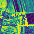
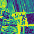
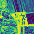
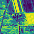
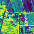
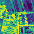
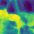
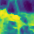
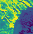
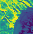
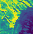
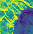
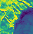
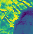
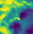
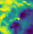
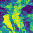
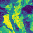
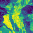
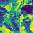
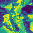
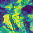
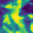
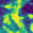
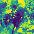
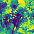
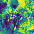
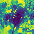
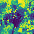
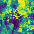
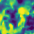
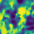
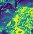
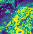
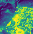
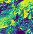
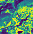
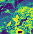
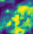
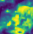

In [13]:
# check out some chips!
landsat_rf.select('index', 'country', 'datetime', 'red', 'green', 'blue', 'nir', 'swir16', 'swir22', 'thermal1', 'thermal2') \
    .filter(rf_tile_max('blue') > 0)

## Sentinel Tiles

In [14]:
# read imagery catalog
catalog = earth_ondemand.read_catalog(cement_df.geometry, 
    start_datetime='2019-10-01', 
    end_datetime='2019-10-02', 
    max_cloud_cover=1,
    collections='sentinel2_l2a'
)

100%|██████████| 7/7 [00:01<00:00,  4.30it/s]


In [15]:
# join imagery catalog back to cement dataframe
cement_catalog = gpd.sjoin(cement_df, catalog)
len(cement_catalog)

7

In [16]:
# show sentinel bands in EoD
earth_ondemand.bands('sentinel2_l2a')

,band_name,eo_common_name,eo_gsd,title,type,collection_id,roles
0,B03_60m,green,60.0,Band 3 - Green 0.560μm (60m),image/jp2,sentinel2_l2a,NaN
1,B08_20m,nir,20.0,Band 8 – NIR 0.833μm (20m),image/jp2,sentinel2_l2a,NaN
2,cloud_mask,NaN,NaN,Cloud mask,application/gml+xml,sentinel2_l2a,NaN
3,tileInfo,NaN,NaN,Tile info,application/json,sentinel2_l2a,[metadata]
4,B06_60m,NaN,60.0,Band 6 – Vegetation Red Edge 0.740μm (60m),image/jp2,sentinel2_l2a,NaN
5,B08_60m,nir,60.0,Band 8 – NIR 0.833μm (60m),image/jp2,sentinel2_l2a,NaN
6,B02_20m,blue,20.0,Band 2 - Blue 0.490μm (20m),image/jp2,sentinel2_l2a,NaN
7,B11_20m,swir16,20.0,Band 11 – SWIR 1.610μm (20m),image/jp2,sentinel2_l2a,NaN
8,CLD_20m,NaN,20.0,Cloud (20m),image/jp2,sentinel2_l2a,NaN
9,B05_20m,NaN,20.0,Band 5 - Vegetation Red Edge 0.705μm (20m),image/jp2,sentinel2_l2a,NaN


In [17]:
# filter out unused columns
cement_catalog = cement_catalog[['index', 'country', 'geometry', 'datetime', 'proj_crs', 'proj_geometry', 'B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B8A_20m', 'B11_20m', 'B12_20m', 'CLD_20m']]

In [18]:
# create structured metadata columns to use: "crs", "extent", "raster_size" - this step isn't necessary but it speeds up creation of the chip data
import pyspark.sql.functions as F

cement_catalog['gsd_10m'] = 10.0
cement_catalog['gsd_20m'] = 20.0

# calculate number of columns and rows in each chip
cement_catalog['raster_cols_10m'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[2] - r.proj_geometry.bounds[0]) / r.gsd_10m,
                            axis=1)

cement_catalog['raster_rows_10m'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[3] - r.proj_geometry.bounds[1]) / r.gsd_10m,
                            axis=1)

# swir bands are at a lower resolution so number of columns and rows will be less
cement_catalog['raster_cols_20m'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[2] - r.proj_geometry.bounds[0]) / r.gsd_20m,
                            axis=1)

cement_catalog['raster_rows_20m'] = \
        cement_catalog.apply(lambda r:                                                     
          (r.proj_geometry.bounds[3] - r.proj_geometry.bounds[1]) / r.gsd_20m,
                            axis=1)
    
spark_catalog = spark.createDataFrame(cement_catalog).repartition(200) \
                     .withColumn('crs',
                                 rf_crs('proj_crs')) \
                     .withColumn('extent',
                                 st_extent('proj_geometry')) \
                     .withColumn('raster_size_10m', 
                                 F.struct(
                                     F.col('raster_cols_10m').cast('int').alias('cols'),
                                     F.col('raster_rows_10m').cast('int').alias('rows')
                                 )) \
                     .withColumn('raster_size_20m', 
                                 F.struct(
                                     F.col('raster_cols_20m').cast('int').alias('cols'),
                                     F.col('raster_rows_20m').cast('int').alias('rows')
                                 )) \
                    .cache()

In [19]:
# from geomesa_pyspark.types import PolygonUDT

# # bump southeast corner function will be used to make things line up with numerical error of reprojecting and arriving at the correct grid postition
# @F.udf(PolygonUDT())
# def bump_southeast_corner(poly):
#     from shapely.geometry import box
#     minx, miny, maxx, maxy = poly.bounds
    
#     return box(minx, #west
#                miny + 1.0, #south
#                maxx - 1.0, # east
#                maxy # north
#               )

# Non-UDF version
def bump_southeast_corner2(tile_col):
    extent = rf_extent(tile_col).alias('extent')
    return st_geometry(F.struct(
        extent['xmin'].alias('xmin'), 
        (extent['ymin'] + 1.0).alias('ymin'), 
        (extent['xmax'] - 1.0).alias('xmax'), 
        extent['ymax'].alias('ymax')
    ))

In [20]:
# create chips using metadata columns
from earthai.chipping.strategy import IntersectingExtent

# 20m columns
sentinel_20m = spark.read.chip(spark_catalog,
                ['B8A_20m', 'B11_20m', 'B12_20m', 'CLD_20m'],
                chipping_strategy=IntersectingExtent(),
                crs_col_name='crs',
                extent_col_name='extent', 
                raster_size_col_name='raster_size_20m'
               ) \
            .withColumn('geom_read_10m', st_reproject(bump_southeast_corner2('B11_20m'), rf_crs('B11_20m'), rf_mk_crs('epsg:4326')))
            #.withColumn('geom_read_10m', st_reproject(bump_southeast_corner(rf_geometry('B11_20m')), rf_crs('B11_20m'), rf_mk_crs('epsg:4326')))
    
# 10m columns
sentinel_10m = spark.read.chip(sentinel_20m,
                ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m'],
                chipping_strategy=IntersectingExtent(),
                geometry_col_name='geom_read_10m',
                crs_col_name='crs',
                extent_col_name='extent', 
                raster_size_col_name='raster_size_10m'
            ) \
            .withColumnRenamed('B04_10m', 'red') \
            .withColumnRenamed('B03_10m', 'green') \
            .withColumnRenamed('B02_10m', 'blue') \
            .withColumnRenamed('B08_10m', 'nir') 

# upsample 20m columns to 10m... it is possible / legal to have different “dimensions” on tiles in the same row, but it is also very likely to generate an error
sentinel_rf = sentinel_10m.select('index', 'country', 'datetime', 'red', 'green', 'blue', 'nir',
                   rf_resample('B8A_20m', 2.0).alias('nir_narrow'),
                   rf_resample('B11_20m', 2.0).alias('swir16'),
                   rf_resample('B12_20m', 2.0).alias('swir21'),
                   rf_resample('CLD_20m', 2.0).alias('cloud'),)

index,country,datetime,red,green,blue,nir,nir_narrow,swir16,swir21,rf_dimensions(blue),rf_dimensions(swir21)
69,Oman,2019-10-01 07:02:57.4949,,,,,,,,"[202, 202]","[202, 202]"
77,China,2019-10-01 02:46:04.865562,,,,,,,,"[202, 202]","[202, 202]"
92,Turkey,2019-10-01 08:39:44.349744,,,,,,,,"[202, 202]","[202, 202]"
48,Egypt,2019-10-01 08:42:52.030983,,,,,,,,"[202, 202]","[202, 202]"
69,Oman,2019-10-01 07:02:53.61074,,,,,,,,"[172, 202]","[172, 202]"

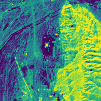
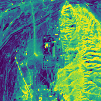
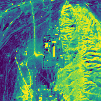
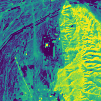
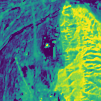
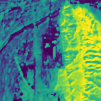
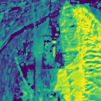
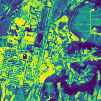
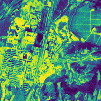
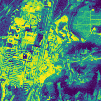
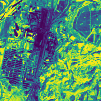
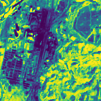
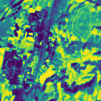
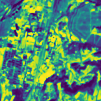
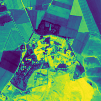
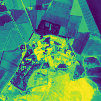
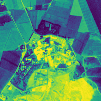
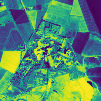
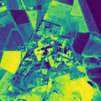
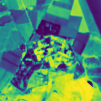
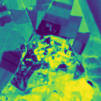
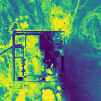
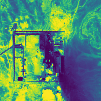
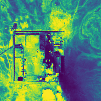
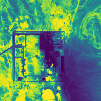
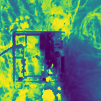
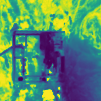
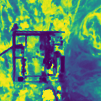
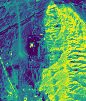
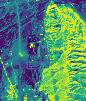
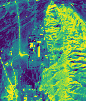
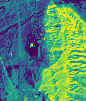
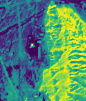
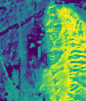
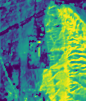

In [21]:
# check out some chips!
sentinel_rf.select('index', 'country', 'datetime', 'red', 'green', 'blue', 'nir', 'nir_narrow', 'swir16', 'swir21', rf_dimensions('blue'), rf_dimensions('swir21')) \
    .filter(rf_tile_max('blue') > 0)